In [1]:

#https://github.com/ekehoe32/orthrus
import sys
sys.path.append('/home/katrina/a/mankovic/ZOETIS/Fall2021/Orthrus/orthrus')
import orthrus
from orthrus import core
from orthrus.core import dataset
import numpy as np
import graph_tools_construction as gt
from matplotlib import pyplot as plt
import pandas
from orthrus.core.pipeline import *
from sklearn.preprocessing import FunctionTransformer
from orthrus.preprocessing.imputation import HalfMinimum
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA


dataroot = '/data4/mankovic/'

An initial analysis of the C1 dataset using the features found by Kartikay Sharma in the file C1_h_vs_s_ifr_result.csv

Last edited on: 9/30/21

Resilts presented on: 

In [2]:
#load Kartikay's gene feature set and store RandIDs for genes
C1_features = pandas.read_csv(dataroot+'De-Identified_CZ/C1_h_vs_s_ifr_result.csv')
randIDs = [str(s) for s in list(C1_features['RandID'])]

#load the entire C1 and Z40 dataset and select the C1 data and metadata
C1_dataset = dataset.load_dataset(dataroot+'De-Identified_CZ/DeId_TPM_C1_Z40.ds')
C1_dataset.data = C1_dataset.data[ C1_dataset.metadata['Project'] == 'C1']
C1_dataset.metadata = C1_dataset.metadata[ C1_dataset.metadata['Project'] == 'C1']

#normalize the dataset
transform = make_pipeline(HalfMinimum(missing_values=0), FunctionTransformer(np.log2))
C1_dataset.normalize(transform, norm_name='HalfMinimum + Log2')
C1_data = C1_dataset.data

#print the metadata
C1_dataset.metadata

,Project,Species,AnimalID,Age,Sex,Diagnosis,Tissue,Level1A,Level2E,Level2M,Symptom,SymptomType,Score,Diagnosis2F,Diagnosis3A,Treatment,CSUHealthState
SeqID,,,,,,,,,,,,,,,,,
91,C1,1,111.0,11.250000,M,Healthy,Not Blood,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Healthy
19,C1,1,107.0,4.000000,F,Healthy,Not Blood,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Healthy
120,C1,1,112.0,2.916667,F,Healthy,Not Blood,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Healthy
136,C1,1,115.0,1.666667,M,Healthy,Not Blood,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Healthy
98,C1,1,46.0,3.000000,F,Level1A,Not Blood,1,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,Sick
28,C1,1,132.0,9.833333,F,Healthy,Not Blood,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Healthy
10,C1,1,128.0,5.916667,M,Healthy,Not Blood,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Healthy
53,C1,1,121.0,4.666667,F,Healthy,Not Blood,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Healthy
7,C1,1,125.0,3.916667,M,Healthy,Not Blood,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Healthy


11 healthy and 13 sick


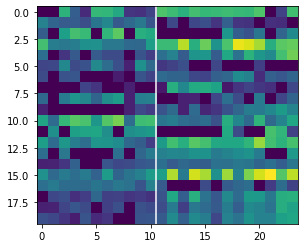

In [3]:
#sick healthy sorted X
healthy_seqID = list(C1_dataset.metadata.query("CSUHealthState == 'Healthy'").index)
sick_seqID = list(C1_dataset.metadata.query("CSUHealthState == 'Sick'").index)
print(str(len(healthy_seqID))+' healthy and ' +str(len(sick_seqID))+' sick')
sorted_X = np.vstack([np.array(C1_data.loc[healthy_seqID][randIDs]), np.array(C1_data.loc[sick_seqID][randIDs])])
plt.imshow(sorted_X[:,:20].T)
plt.axvline(10.5,  color = 'white')

## Run this for Sick and Healthy Networks

In [4]:
#get row labels for only the sick and healthy subjects seqIDs
idx = np.array(C1_dataset.metadata['CSUHealthState'] == 'Sick') + np.array(C1_dataset.metadata['CSUHealthState'] == 'Healthy')
seqID_labels = C1_dataset.metadata['CSUHealthState'][idx] 

print(seqID_labels)

seqIDs = list(C1_dataset.metadata[idx].index)
len(seqIDs)


SeqID
91     Healthy
19     Healthy
120    Healthy
136    Healthy
98        Sick
28     Healthy
10     Healthy
53     Healthy
7      Healthy
95     Healthy
102       Sick
51        Sick
112       Sick
57        Sick
4      Healthy
60        Sick
127       Sick
72        Sick
15        Sick
86     Healthy
124       Sick
25        Sick
71        Sick
58        Sick
Name: CSUHealthState, dtype: object


24

In [5]:
#slice the normalized dataset by using the sick and healthy subjects and only the genes in Kartikay's features
C1_pathway_data = C1_data.loc[seqIDs][randIDs]
C1_pathway_data.shape

(24, 1067)

In [6]:
#cast the data as a numpy array
X = np.array(C1_pathway_data)
m= X.shape[1]

X.shape, np.max(X), np.min(X)

((24, 1067), 13.147149629637221, -5.800827090742239)

### Correlation Network

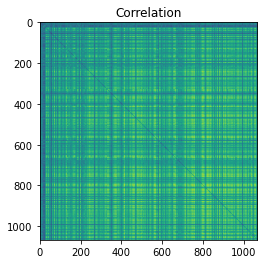

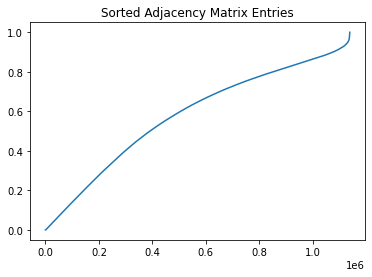

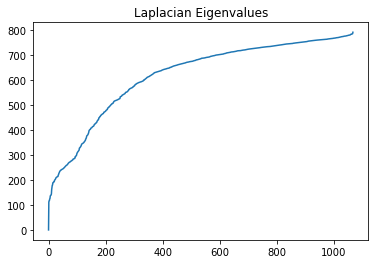

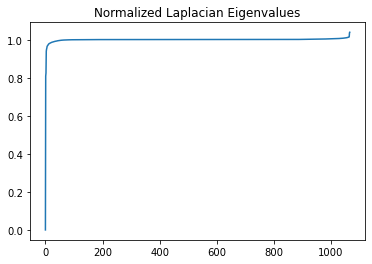

In [7]:
#generate adjacency matrix
similarity = 'correlation'
A = gt.adjacency_matrix(X,similarity)


#calculate the laplacian
incident_edges = np.sum(A,axis = 1)
#degree matrix
D = np.diag(incident_edges)*np.eye(m)
L = D-A

#calculate the normalized laplacian
snD = np.diag(1/np.sqrt(incident_edges))*np.eye(m)
Ln = snD @ (D-A) @ snD


#plots
plt.figure()
plt.imshow(A)
plt.title('Correlation')

plt.figure('A')
plt.title('Sorted Adjacency Matrix Entries')
plt.plot(np.sort(A.flatten()))

plt.figure('L')
plt.title('Laplacian Eigenvalues')
plt.plot(np.linalg.eigh(L)[0])

plt.figure('Ln')
plt.title('Normalized Laplacian Eigenvalues')
plt.plot(np.linalg.eigh(Ln)[0])




In [8]:
#choose whether or not we're using the normalized laplacian
not_normalized_laplacian = False

nodes = np.arange(m)

clst_adj_cor = []
clst_node_cor = []
all_clusters_node_cor = []

#do highearchical bipartitioning using fiedler vector
gt.cluster_laplace(A, clst_adj_cor, nodes, 1, clst_node_cor, all_clusters_node_cor, fiedler_switch =not_normalized_laplacian)



Text(0, 0.5, 'Cluster Sizes')

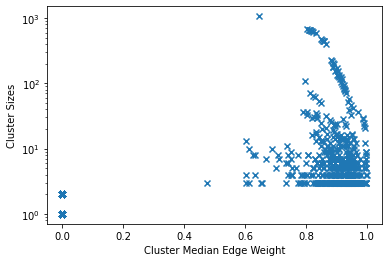

In [10]:
#this gives number of nodes in highest median correlation cluster
n_clusters = len(all_clusters_node_cor)
cluster_scores = np.zeros(n_clusters)
cluster_sizes = np.zeros(n_clusters)
for ii in range(n_clusters):
    cluster = all_clusters_node_cor[ii]
    n_nodes = len(cluster)
    cluster_sizes[ii] = n_nodes
    if n_nodes > 2:
        weights = []
        for i in range(n_nodes):
            for j in range(i+1, n_nodes,1):
                weights.append(A[cluster[i],cluster[j]])
        cluster_scores[ii] = np.median(weights)

len(all_clusters_node_cor[np.argmax(cluster_scores)])

plt.scatter(cluster_scores, cluster_sizes, marker = 'x')
plt.yscale('log')
plt.xlabel('Cluster Median Edge Weight')
plt.ylabel('Cluster Sizes')

In [11]:
min_module_size = 10
min_cor = .95

idx_scores = np.where(cluster_scores > min_cor)[0]
idx_sizes = np.where(cluster_sizes > min_module_size)[0]
idx = list(set(idx_scores).intersection(set(idx_sizes)))
[cluster_sizes[i] for i in idx]

[42.0,
 36.0,
 17.0,
 16.0,
 14.0,
 12.0,
 29.0,
 14.0,
 28.0,
 25.0,
 11.0,
 22.0,
 21.0,
 12.0]

In [12]:
modules = []
for i in idx:
    modules.append([randIDs[j] for j in all_clusters_node_cor[i]])

In [13]:
#plot the dendrogram
for jd in [True, False]:
    gt.plot_dendrogram(all_clusters_node_cor, A, sorted_X, clst_dst = 'dumb', fname = 'delete_me.png', title='Dendrogram', just_dendrogram = jd, split = 11)

IndexError: index 1 is out of bounds for axis 0 with size 1

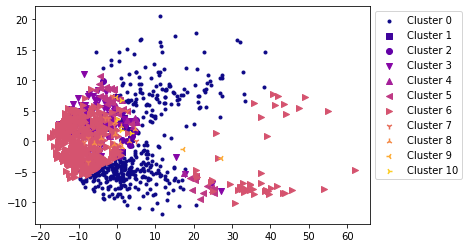

In [13]:

#calculate linkage matrix
Z_cor = gt.linkage_matrix(all_clusters_node_cor, A, 'dumb')


#plot some of the most distinct clusters
number_clusters = 11

labels = gt.cut_tree(Z_cor, n_clusters = number_clusters)
pca = PCA(n_components = 2)
embedding = pca.fit_transform(X.T)

markers = [".",",","o","v","^","<",">","1","2","3","4","8","s","p","P","*","h","H","+","x","X","D","d","|","_"]

color_list = plt.get_cmap('plasma').colors

n_colors = len(color_list)

c_sampler = [i*(n_colors//number_clusters) for i in range(number_clusters)]



for i in range(0,number_clusters,1):
    idx = np.where(labels == i)[0]
    # plt.scatter(embedding[idx,0],embedding[idx,1], color = colors[i % 5], marker = markers[i % 5], label = 'Cluster '+str(i))
    plt.scatter(embedding[idx,0],embedding[idx,1], color = color_list[c_sampler[i]], marker = markers[i], label = 'Cluster '+str(i))

plt.legend(loc="upper left", bbox_to_anchor=(1,1))





In [14]:
denovo_pathways = pandas.DataFrame(columns = randIDs, data = np.zeros((11, len(randIDs))))
for i in range(11):
    idx = np.where(labels == i)[0]
    for j in idx:
        denovo_pathways.iloc[i][randIDs[j]] = 1

denovo_pathways.to_csv('../denovo_pathways/denovo_pathways_C1_correlation_10pathways.csv')

FileNotFoundError: [Errno 2] No such file or directory: '../denovo_pathways/denovo_pathways_C1_correlation_10pathways.csv'

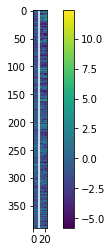

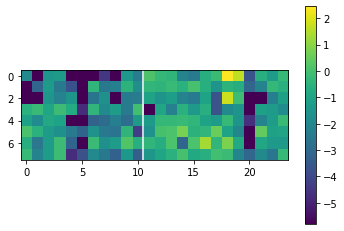

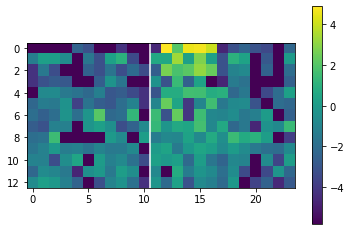

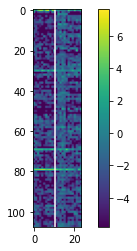

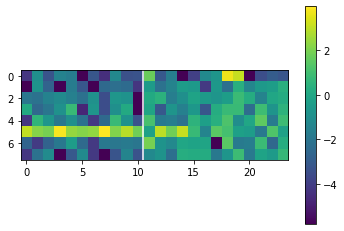

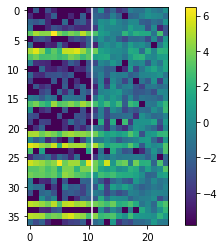

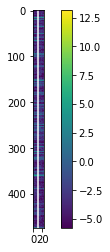

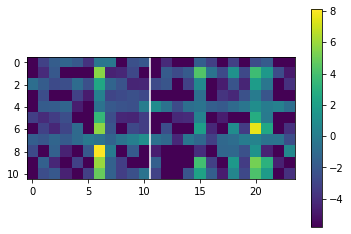

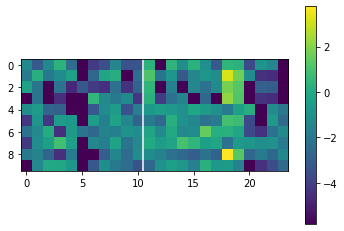

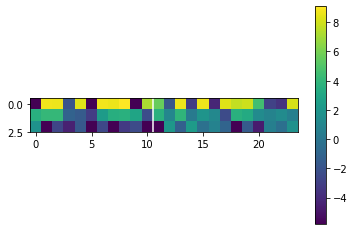

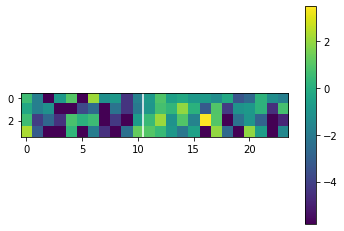

In [15]:
#cluster number 3
for i in range(11):
    plt.figure()
    idx = np.where(labels == i)[0]
    plt.imshow(sorted_X[:,idx].T)
    plt.axvline(10.5, color = 'white')
    plt.colorbar()

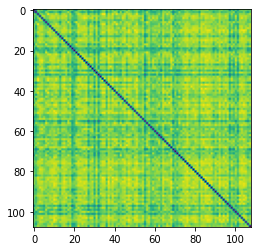

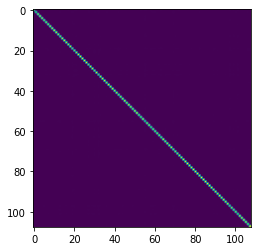

In [16]:
the_cluster = np.where(labels == 3)[0]
n_nodes = len(the_cluster)
small_A = np.zeros((n_nodes,n_nodes))
for i in range(n_nodes):
    for j in range(n_nodes):
        small_A[i,j] = A[the_cluster[i],the_cluster[j]]

plt.figure()
plt.imshow(small_A)

plt.figure()
D = np.diag(np.sum(small_A,axis=1))
plt.imshow(D-small_A)



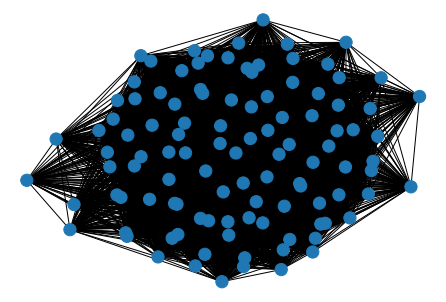

In [17]:
node_sizes = np.ones(n_nodes)*150

new_A = small_A.copy()
new_A[np.where(new_A < .6)] = 0



gt.displaygraph(new_A, node_sizes, layout = 'spring')

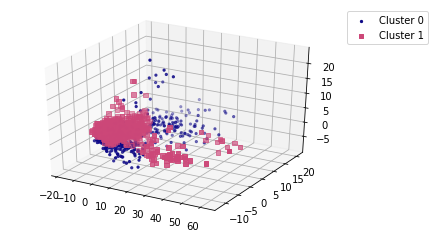

In [18]:
# %matplotlib notebook

#plot some of the most distinct clusters
number_clusters = 2

labels = gt.cut_tree(Z_cor, n_clusters =number_clusters)
pca = PCA(n_components = 3)
embedding = pca.fit_transform(X.T)

markers = [".",",","o","v","^","<",">","1","2","3","4","8","s","p","P","*","h","H","+","x","X","D","d","|","_"]

color_list = plt.get_cmap('plasma').colors

n_colors = len(color_list)

c_sampler = [i*(n_colors//number_clusters) for i in range(number_clusters)]
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
for i in range(0,number_clusters,1):
    idx = np.where(labels == i)[0]
    # plt.scatter(embedding[idx,0],embedding[idx,1], color = colors[i % 5], marker = markers[i % 5], label = 'Cluster '+str(i))
    ax.scatter(embedding[idx,0],embedding[idx,1],embedding[idx,2], color = color_list[c_sampler[i]], marker = markers[i], label = 'Cluster '+str(i))

plt.legend(loc="upper left", bbox_to_anchor=(1,1))


Index(['14203', '17774', '23887', '35125', '534', '17953', '16200', '28911',
       '21341', '33496',
       ...
       '6959', '34413', '35084', '25130', '23381', '7438', '7726', '6401',
       '25904', '21830'],
      dtype='object', name='RandID', length=677)

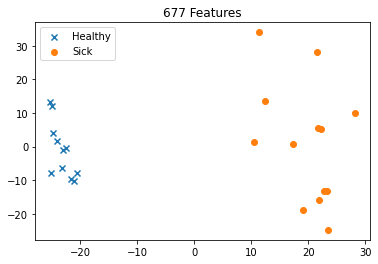

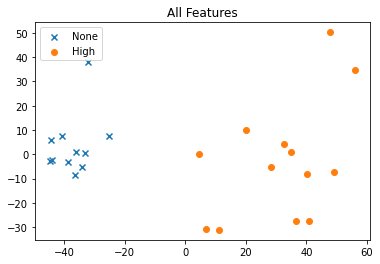

In [19]:
# %matplotlib inline

#plot a pca of the subjects using cluster number 2
idx = np.where(labels == 1)[0]

pca = PCA(n_components = 2)
embedding = pca.fit_transform(X[:,idx])

plt.figure()
idx_none = np.where(np.array(seqID_labels) == 'Healthy')
idx_high = np.where(np.array(seqID_labels) == 'Sick')
plt.scatter(embedding[idx_none,0], embedding[idx_none,1], label = 'Healthy', marker = 'x')
plt.scatter(embedding[idx_high,0], embedding[idx_high,1], label = 'Sick', marker = 'o')
plt.title(str(len(idx))+ ' Features')
plt.legend()

pca = PCA(n_components = 2)
embedding = pca.fit_transform(X)

plt.figure()
plt.title('All Features')
plt.scatter(embedding[idx_none,0], embedding[idx_none,1], label = 'None', marker = 'x')
plt.scatter(embedding[idx_high,0], embedding[idx_high,1], label = 'High', marker = 'o')
plt.legend()

#the selected genes
C1_pathway_data.columns[idx]

### Heat Kernel

In [7]:
#parameter choices

similarity = 'heatkernel'
fname = 'delete_me.png'
title = 'synthetic_test'
m=X.shape[1]

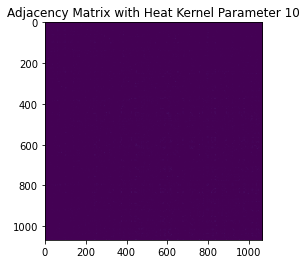

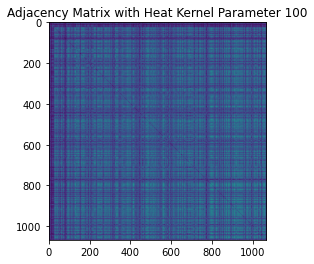

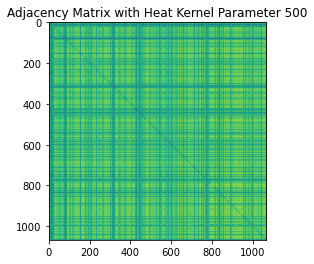

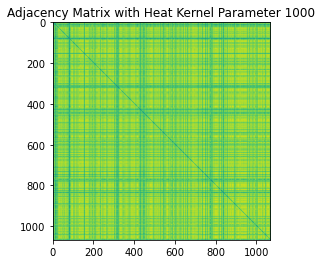

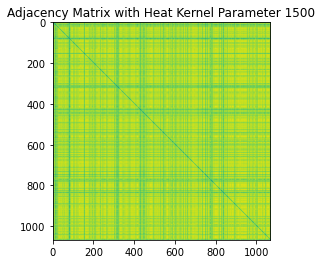

/home/katrina/a/mankovic/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:137: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


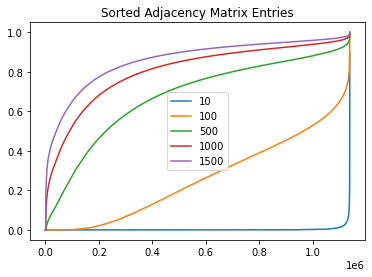

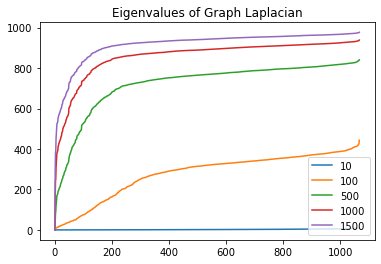

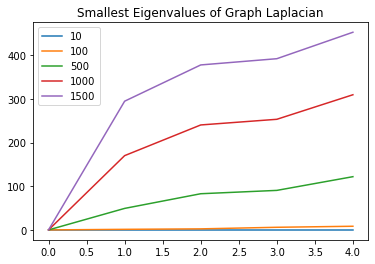

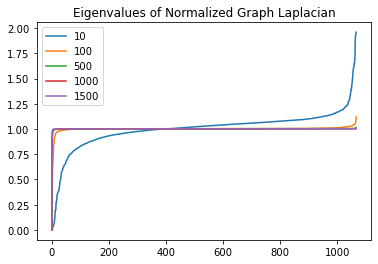

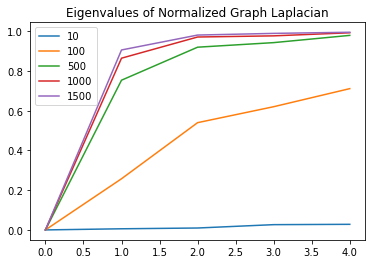

In [8]:
#plots for network with different heat kernel parameters


for hkp in [10, 100, 500, 1000, 1500]:

    A = gt.adjacency_matrix(X,similarity,h_k_param=hkp)

    plt.figure()
    plt.imshow(A)
    plt.title('Adjacency Matrix with Heat Kernel Parameter ' +str(hkp))

    #laplacian
    incident_edges = np.sum(A,axis = 1)
    #degree matrix
    D = np.diag(incident_edges)*np.eye(m)
    L = D-A

    #calculate the normalized laplacian
    snD = np.diag(1/np.sqrt(incident_edges))*np.eye(m)
    Ln = snD @ (D-A) @ snD

    

    plt.figure('A')
    plt.plot(np.sort(A.flatten()), label = str(hkp))
    plt.legend()
    plt.title('Sorted Adjacency Matrix Entries')

    plt.figure('L')
    plt.plot(np.linalg.eigh(L)[0], label = str(hkp))
    plt.legend()
    plt.title('Eigenvalues of Graph Laplacian')

    plt.figure('L_small')
    plt.plot(np.linalg.eigh(L)[0][:5], label = str(hkp))
    plt.legend()
    plt.title('Smallest Eigenvalues of Graph Laplacian')

    plt.figure('Ln')
    plt.plot(np.linalg.eigh(Ln)[0], label = str(hkp))
    plt.legend()
    plt.title('Eigenvalues of Normalized Graph Laplacian')

    plt.figure('Ln_small')
    plt.plot(np.linalg.eigh(Ln)[0][:5], label = str(hkp))
    plt.legend()
    plt.title('Eigenvalues of Normalized Graph Laplacian')




Text(0.5, 1.0, 'Heat Kernel')

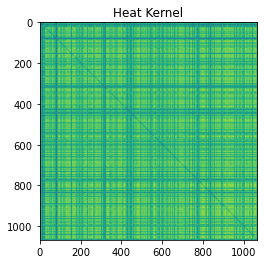

In [9]:
#we choose a heat kernel parameter of 500

A = gt.adjacency_matrix(X,similarity,h_k_param=500)

plt.figure
plt.imshow(A)
plt.title('Heat Kernel')

In [12]:
#higherarchical bi-partitioning

#whether or not we'll use normalized graph laplacian
not_normalized_laplacian = True


nodes = np.arange(m)


clst_adj_hk = []
clst_node_hk = []
all_clusters_node_hk = []

gt.cluster_laplace(A, clst_adj_hk, nodes, 1, clst_node_hk, all_clusters_node_hk, fiedler_switch =not_normalized_laplacian, stop_criteria = 'weight')



In [1]:
count = 0
for c in all_clusters_node_hk:
    if len(c)==1:
        count +=1
count, m

NameError: name 'all_clusters_node_hk' is not defined

Text(0, 0.5, 'Cluster Sizes')

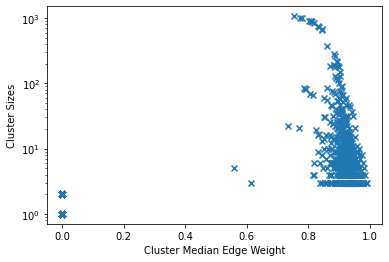

In [12]:
#this gives number of nodes in highest median correlation cluster
n_clusters = len(all_clusters_node_hk)
cluster_scores = np.zeros(n_clusters)
cluster_sizes = np.zeros(n_clusters)
for ii in range(n_clusters):
    cluster = all_clusters_node_hk[ii]
    n_nodes = len(cluster)
    cluster_sizes[ii] = n_nodes
    if n_nodes > 2:
        weights = []
        for i in range(n_nodes):
            for j in range(i+1, n_nodes,1):
                weights.append(A[cluster[i],cluster[j]])
        cluster_scores[ii] = np.median(weights)

len(all_clusters_node_hk[np.argmax(cluster_scores)])

plt.scatter(cluster_scores, cluster_sizes, marker = 'x')
plt.yscale('log')
plt.xlabel('Cluster Median Edge Weight')
plt.ylabel('Cluster Sizes')

In [13]:
min_module_size = 10
min_cor = .95

idx_scores = np.where(cluster_scores > min_cor)[0]
idx_sizes = np.where(cluster_sizes > min_module_size)[0]
idx = list(set(idx_scores).intersection(set(idx_sizes)))
[cluster_sizes[i] for i in idx]

[21.0, 15.0, 11.0]

In [60]:
modules = []
for i in idx:
    modules.append([randIDs[j] for j in all_clusters_node_hk[i]])

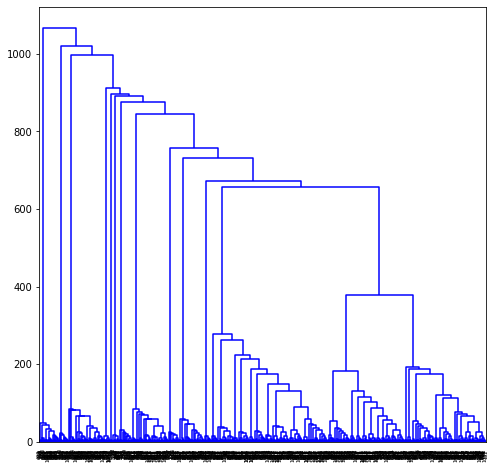

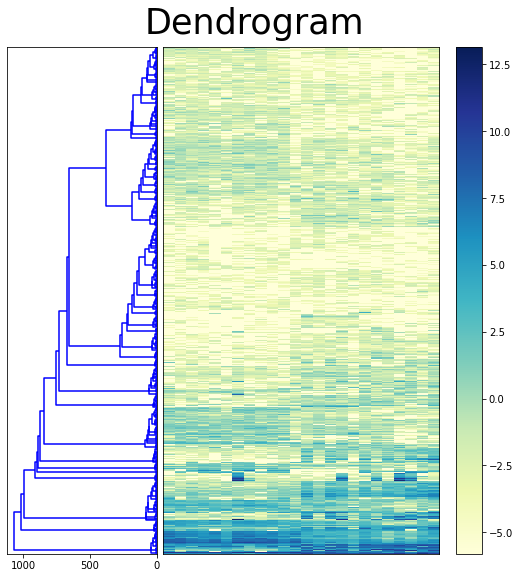

In [25]:
#plot dendrograms

for jd in [True, False]:
    gt.plot_dendrogram(all_clusters_node_hk, A, sorted_X, clst_dst = 'dumb', fname = 'delete_me.png', title='Dendrogram', just_dendrogram = jd, split = 11)


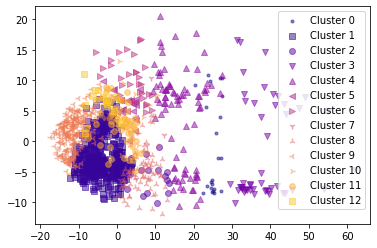

In [26]:
#cut tree to get most distinct clusters
number_clusters = 13


#linkage matrix
Z_hk= gt.linkage_matrix(all_clusters_node_hk, A, 'dumb')

#cut it
labels = gt.cut_tree(Z_hk, n_clusters = number_clusters)

#PCA of genes labeled by cluster
pca = PCA(n_components = 2)
embedding = pca.fit_transform(X.T)

markers = [".",",","o","v","^","<",">","1","2","3","4","8","s","p","P","*","h","H","+","x","X","D","d","|","_"]

color_list = plt.get_cmap('plasma').colors

n_colors = len(color_list)

c_sampler = [i*(n_colors//number_clusters) for i in range(number_clusters)]

for i in range(0,number_clusters,1):
    idx = np.where(labels == i)[0]
    plt.scatter(embedding[idx,0],embedding[idx,1], color = color_list[c_sampler[i]], marker = markers[i], label = 'Cluster '+str(i), alpha = .5)

plt.legend()


In [27]:
denovo_pathways = pandas.DataFrame(columns = randIDs, data = np.zeros((13, len(randIDs))))
for i in range(13):
    idx = np.where(labels == i)[0]
    for j in idx:
        denovo_pathways.iloc[i][randIDs[j]] = 1

denovo_pathways.to_csv('../denovo_pathways/denovo_pathways_C1_heatkernel_13pathways.csv')

FileNotFoundError: [Errno 2] No such file or directory: '../denovo_pathways/denovo_pathways_C1_heatkernel_13pathways.csv'

In [ ]:
#cluster number 3
idx = np.where(labels == 1)[0]
plt.imshow(sorted_X[:,idx].T)
plt.vlines(10.5, 0,len(idx)-1, color = 'white')
plt.colorbar()

Index(['12673', '20140', '17953', '16200', '32361', '27545', '10472', '21341',
       '6090', '14984',
       ...
       '16165', '5194', '5633', '8362', '21700', '34413', '35084', '21262',
       '7438', '21830'],
      dtype='object', name='RandID', length=378)

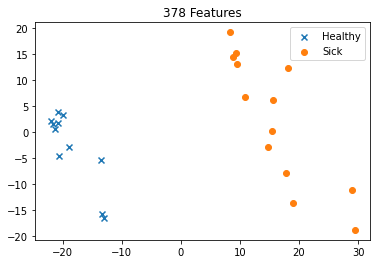

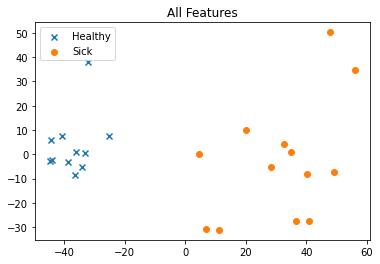

In [23]:
#PCA of subjects using genes in cluster number 1

idx = np.where(labels == 1)[0]

pca = PCA(n_components = 2)
embedding = pca.fit_transform(X[:,idx])

plt.figure()
idx_none = np.where(np.array(seqID_labels) == 'Healthy')
idx_high = np.where(np.array(seqID_labels) == 'Sick')
plt.scatter(embedding[idx_none,0], embedding[idx_none,1], label = 'Healthy', marker = 'x')
plt.scatter(embedding[idx_high,0], embedding[idx_high,1], label = 'Sick', marker = 'o')
plt.title(str(len(idx))+ ' Features')
plt.legend()

pca = PCA(n_components = 2)
embedding = pca.fit_transform(X)

plt.figure()
plt.title('All Features')
plt.scatter(embedding[idx_none,0], embedding[idx_none,1], label = 'Healthy', marker = 'x')
plt.scatter(embedding[idx_high,0], embedding[idx_high,1], label = 'Sick', marker = 'o')
plt.legend()

#the selected genes
C1_pathway_data.columns[idx]

## Just Sick Subjects for Network Generation

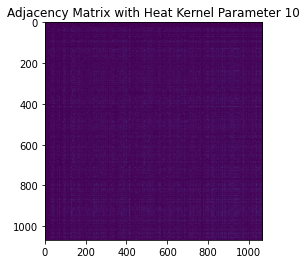

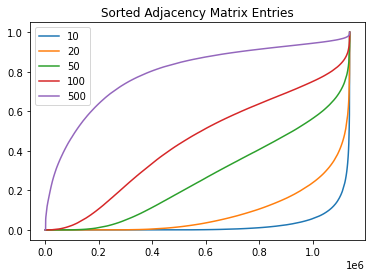

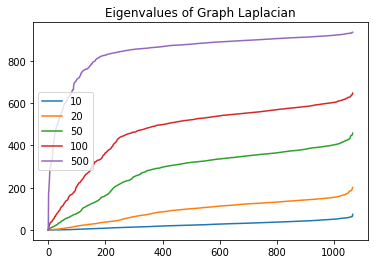

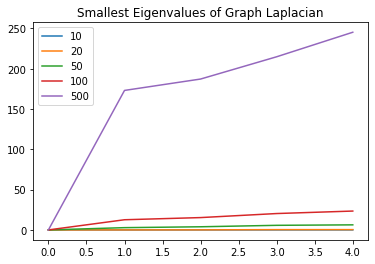

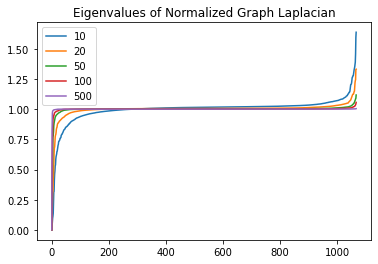

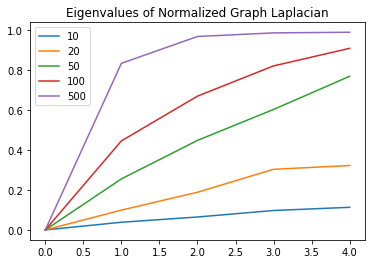

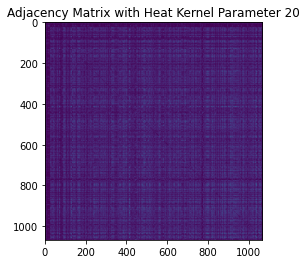

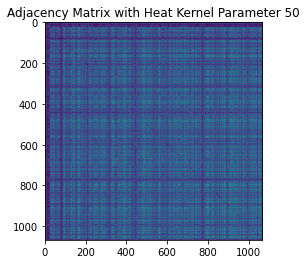

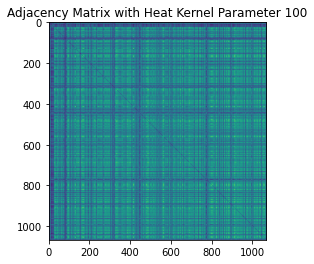

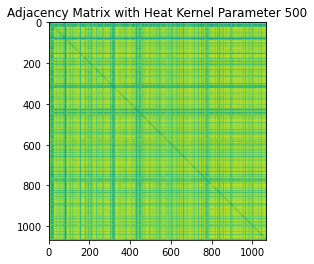

In [24]:
#slice just the sick subjects
idx_sick = np.array(C1_dataset.metadata['CSUHealthState'] == 'Sick')
seqIDs_sick = list(C1_dataset.metadata[idx_sick].index)


C1_pathway_data_sick = C1_data.loc[seqIDs_sick][randIDs]

X_sick = np.array(C1_pathway_data_sick)
m= X_sick.shape[1]




#parameters
similarity = 'heatkernel'
fname = 'delete_me.png'
title = 'synthetic_test'
h_k_ord = 2 #p-norn in heat kernel

evals = []


for hkp in [10, 20, 50, 100, 500]:
   
    # A = gt.adjacency_matrix(X,similarity,h_k_param=hkp)+(np.ones((m,m)) - np.eye(m))*10E-16

    A = gt.adjacency_matrix(X_sick,similarity,h_k_param=hkp, h_k_ord = h_k_ord)

    plt.figure()
    plt.imshow(A)
    plt.title('Adjacency Matrix with Heat Kernel Parameter ' +str(hkp))

    #laplacian
    incident_edges = np.sum(A,axis = 1)
    #degree matrix
    D = np.diag(incident_edges)*np.eye(m)
    L = D-A

    #calculate the normalized laplacian
    snD = np.diag(1/np.sqrt(incident_edges))*np.eye(m)
    Ln = snD @ (D-A) @ snD

    

    plt.figure('A')
    plt.plot(np.sort(A.flatten()), label = str(hkp))
    plt.legend()
    plt.title('Sorted Adjacency Matrix Entries')

    plt.figure('L')
    plt.plot(np.linalg.eigh(L)[0], label = str(hkp))
    plt.legend()
    plt.title('Eigenvalues of Graph Laplacian')

    plt.figure('L_small')
    plt.plot(np.linalg.eigh(L)[0][:5], label = str(hkp))
    plt.legend()
    plt.title('Smallest Eigenvalues of Graph Laplacian')

    plt.figure('Ln')
    plt.plot(np.linalg.eigh(Ln)[0], label = str(hkp))
    plt.legend()
    plt.title('Eigenvalues of Normalized Graph Laplacian')

    plt.figure('Ln_small')
    plt.plot(np.linalg.eigh(Ln)[0][:5], label = str(hkp))
    plt.legend()
    plt.title('Eigenvalues of Normalized Graph Laplacian')




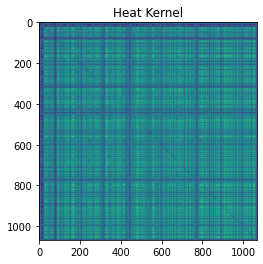

In [25]:
#choose 100 as heat kernel parameter

#whether or not we'll use normalized graph laplacian
not_normalized_laplacian = False

h_k_ord = 2 #p-norn in heat kernel

A_hk = gt.adjacency_matrix(X_sick,similarity,h_k_param=100, h_k_ord = h_k_ord)

plt.figure
plt.imshow(A_hk)
plt.title('Heat Kernel')


#do laplace clustering
nodes = np.arange(m)


clst_adj_hk = []
clst_node_hk = []
all_clusters_node_hk = []

gt.cluster_laplace(A_hk, clst_adj_hk, nodes, 1, clst_node_hk, all_clusters_node_hk, fiedler_switch=not_normalized_laplacian)


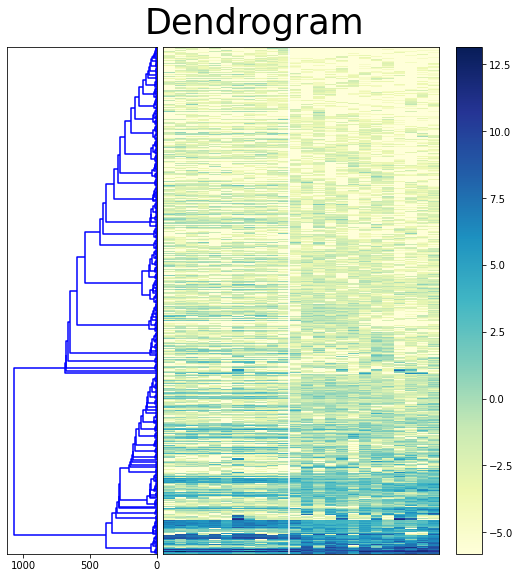

In [26]:
#plot the dendrogram
gt.plot_dendrogram(all_clusters_node_hk, A_hk, sorted_X, clst_dst = 'dumb', fname = 'delete_me.png', title='Dendrogram', just_dendrogram = False, split = 11)

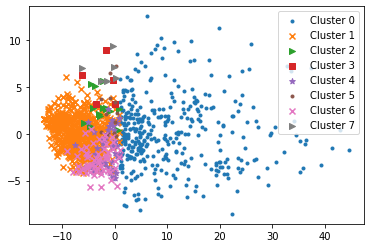

In [27]:
Z_hk= gt.linkage_matrix(all_clusters_node_hk, A_hk, 'dumb')

labels = gt.cut_tree(Z_hk, n_clusters = 8)



pca = PCA(n_components = 2)
embedding = pca.fit_transform(X_sick.T)

colors = ['r','g','b','c','y']
markers = ['.', 'x', '>', 's', '*']

for i in range(8):
    idx = np.where(labels == i)[0]
    plt.scatter(embedding[idx,0],embedding[idx,1], marker = markers[i % 5], label = 'Cluster '+str(i))

plt.legend()


In [28]:
def parameter_test(X_sick, hkp, h_k_ord, not_normalized_laplacian = False):
    A = gt.adjacency_matrix(X_sick,'heatkernel',h_k_param=hkp, h_k_ord = h_k_ord)

    plt.figure()
    plt.imshow(A)
    plt.title('Adjacency Matrix with Heat Kernel Parameter ' +str(hkp))

    #laplacian
    incident_edges = np.sum(A,axis = 1)
    #degree matrix
    D = np.diag(incident_edges)*np.eye(m)
    L = D-A

    #calculate the normalized laplacian
    snD = np.diag(1/np.sqrt(incident_edges))*np.eye(m)
    Ln = snD @ (D-A) @ snD

    

    plt.figure('A')
    plt.plot(np.sort(A.flatten()), label = str(hkp))
    plt.legend()
    plt.title('Sorted Adjacency Matrix Entries')

    if not_normalized_laplacian:
        plt.figure('L')
        plt.plot(np.linalg.eigh(L)[0], label = str(hkp))
        plt.legend()
        plt.title('Eigenvalues of Graph Laplacian')

    else:
        plt.figure('Ln')
        plt.plot(np.linalg.eigh(Ln)[0], label = str(hkp))
        plt.legend()
        plt.title('Eigenvalues of Normalized Graph Laplacian')

    #do laplace clustering
    nodes = np.arange(m)


    clst_adj_hk = []
    clst_node_hk = []
    all_clusters_node_hk = []

    gt.cluster_laplace(A, clst_adj_hk, nodes, 1, clst_node_hk, all_clusters_node_hk, fiedler_switch=not_normalized_laplacian)

    #plot the dendrogram
    gt.plot_dendrogram(all_clusters_node_hk, A, sorted_X, clst_dst = 'dumb', fname = 'delete_me.png', title='Dendrogram', just_dendrogram = False, split = 11)

    Z_hk= gt.linkage_matrix(all_clusters_node_hk, A, 'dumb')

    return Z_hk


    


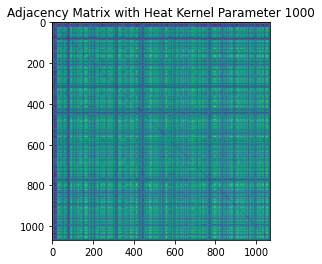

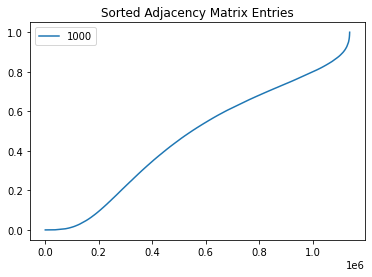

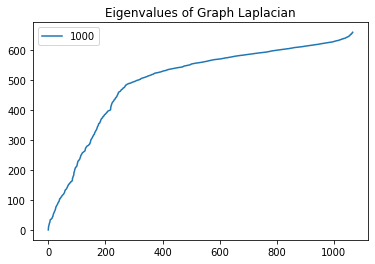

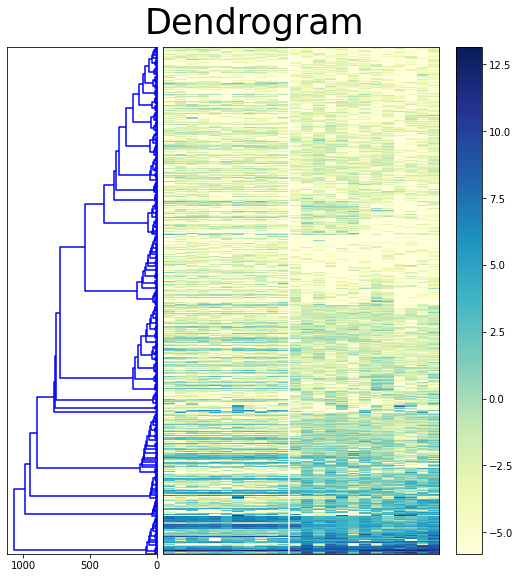

In [29]:
hkp = 1000
h_k_ord = 1
not_normalized_laplacian = True

Z_hk = parameter_test(X_sick, hkp, h_k_ord, not_normalized_laplacian)

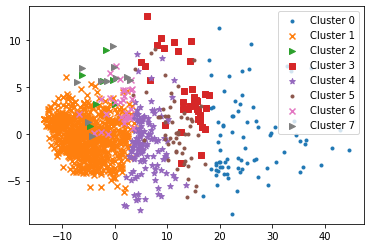

In [30]:

number_of_clusters = 8


labels = gt.cut_tree(Z_hk, n_clusters = number_of_clusters)

pca = PCA(n_components = 2)
embedding = pca.fit_transform(X_sick.T)

colors = ['r','g','b','c','y']
markers = ['.', 'x', '>', 's', '*']

for i in range(number_of_clusters):
    idx = np.where(labels == i)[0]
    plt.scatter(embedding[idx,0],embedding[idx,1], marker = markers[i % 5], label = 'Cluster '+str(i))

plt.legend()

## Just Healthy Subjects for Network Generation

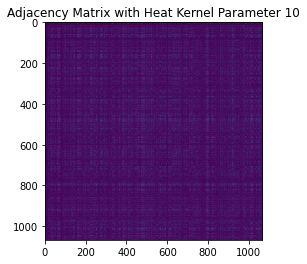

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/IPython/core/pylabtools.py:137: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


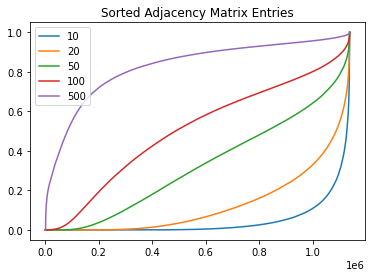

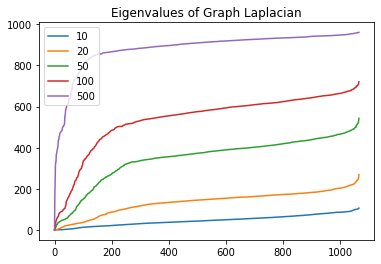

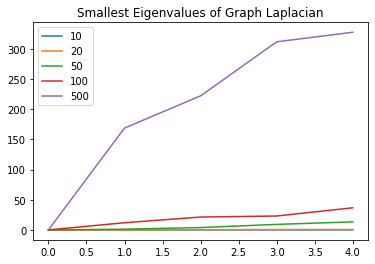

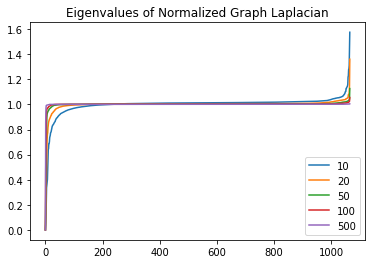

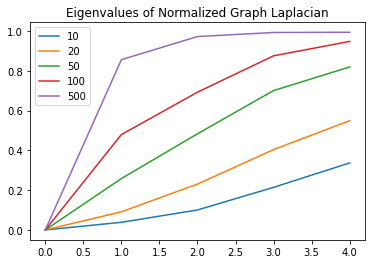

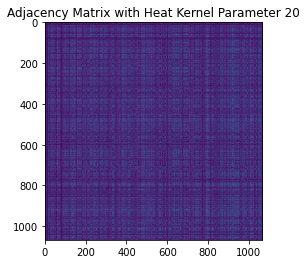

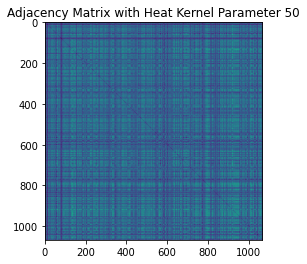

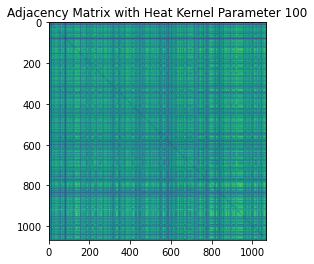

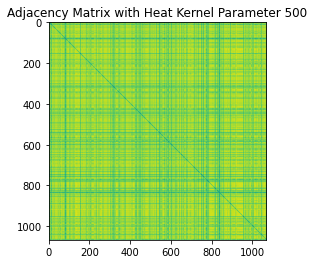

In [31]:
#slice just the sick subjects
idx_healthy = np.array(C1_dataset.metadata['CSUHealthState'] == 'Healthy')
seqIDs_healthy = list(C1_dataset.metadata[idx_healthy].index)


C1_pathway_data_healthy = C1_data.loc[seqIDs_healthy][randIDs]

X_healthy = np.array(C1_pathway_data_healthy)
m= X_healthy.shape[1]




#parameters
similarity = 'heatkernel'
fname = 'delete_me.png'
title = 'synthetic_test'
h_k_ord = 2 #p-norn in heat kernel

evals = []


for hkp in [10, 20, 50, 100, 500]:
   
    # A = gt.adjacency_matrix(X,similarity,h_k_param=hkp)+(np.ones((m,m)) - np.eye(m))*10E-16

    A = gt.adjacency_matrix(X_healthy,similarity,h_k_param=hkp, h_k_ord = h_k_ord)

    plt.figure()
    plt.imshow(A)
    plt.title('Adjacency Matrix with Heat Kernel Parameter ' +str(hkp))

    #laplacian
    incident_edges = np.sum(A,axis = 1)
    #degree matrix
    D = np.diag(incident_edges)*np.eye(m)
    L = D-A

    #calculate the normalized laplacian
    snD = np.diag(1/np.sqrt(incident_edges))*np.eye(m)
    Ln = snD @ (D-A) @ snD

    

    plt.figure('A')
    plt.plot(np.sort(A.flatten()), label = str(hkp))
    plt.legend()
    plt.title('Sorted Adjacency Matrix Entries')

    plt.figure('L')
    plt.plot(np.linalg.eigh(L)[0], label = str(hkp))
    plt.legend()
    plt.title('Eigenvalues of Graph Laplacian')

    plt.figure('L_small')
    plt.plot(np.linalg.eigh(L)[0][:5], label = str(hkp))
    plt.legend()
    plt.title('Smallest Eigenvalues of Graph Laplacian')

    plt.figure('Ln')
    plt.plot(np.linalg.eigh(Ln)[0], label = str(hkp))
    plt.legend()
    plt.title('Eigenvalues of Normalized Graph Laplacian')

    plt.figure('Ln_small')
    plt.plot(np.linalg.eigh(Ln)[0][:5], label = str(hkp))
    plt.legend()
    plt.title('Eigenvalues of Normalized Graph Laplacian')




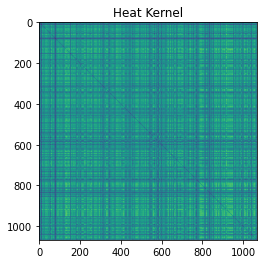

In [32]:
#choose 100 as heat kernel parameter

#whether or not we'll use normalized graph laplacian
not_normalized_laplacian = True

h_k_ord = 2 #p-norn in heat kernel

A_hk = gt.adjacency_matrix(X_healthy,similarity,h_k_param=100, h_k_ord = h_k_ord)

plt.figure
plt.imshow(A_hk)
plt.title('Heat Kernel')


#do laplace clustering
nodes = np.arange(m)


clst_adj_hk = []
clst_node_hk = []
all_clusters_node_hk = []

gt.cluster_laplace(A_hk, clst_adj_hk, nodes, 1, clst_node_hk, all_clusters_node_hk, fiedler_switch=not_normalized_laplacian)


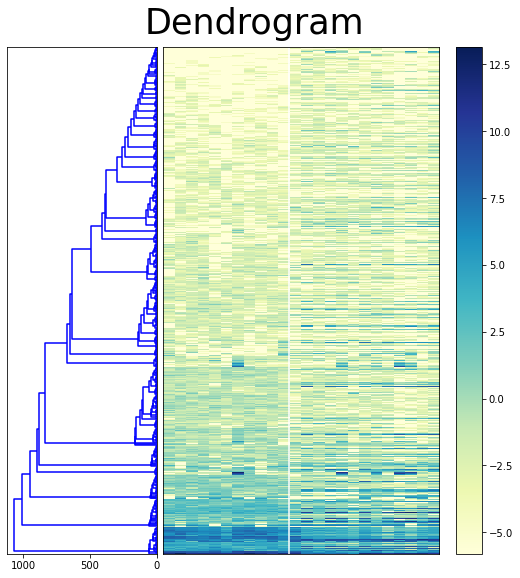

In [33]:
#plot the dendrogram
gt.plot_dendrogram(all_clusters_node_hk, A_hk, sorted_X, clst_dst = 'dumb', fname = 'delete_me.png', title='Dendrogram', just_dendrogram = False, split = 11)

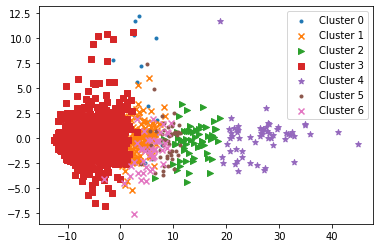

In [34]:
Z_hk= gt.linkage_matrix(all_clusters_node_hk, A_hk, 'dumb')

labels = gt.cut_tree(Z_hk, n_clusters = 7)



pca = PCA(n_components = 2)
embedding = pca.fit_transform(X_healthy.T)

colors = ['r','g','b','c','y']
markers = ['.', 'x', '>', 's', '*']

for i in range(7):
    idx = np.where(labels == i)[0]
    plt.scatter(embedding[idx,0],embedding[idx,1], marker = markers[i % 5], label = 'Cluster '+str(i))

plt.legend()
